In [130]:
# importing needed libraries 
import numpy as np
import torch 
import torch.nn as nn
import matplotlib.pyplot as plt
import matplotlib_inline
from IPython import display 
%matplotlib inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

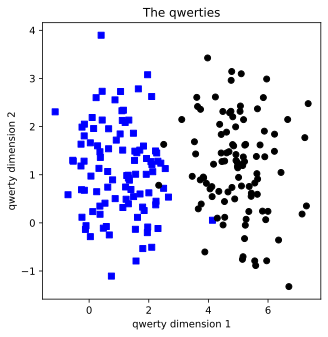

In [131]:
# create the data
nPerClust = 100
blur = 1

# center coordinates for the data cloud
A = [1, 1]
B = [5, 1]

# generating the data
a = [A[0]+np.random.randn(nPerClust)*blur, A[1]+np.random.randn(nPerClust)*blur]
b = [B[0]+np.random.randn(nPerClust)*blur, B[1]+np.random.randn(nPerClust)*blur]

# the true labels
labels_np = np.vstack((np.zeros((nPerClust,1)),np.ones((nPerClust,1))))

# concatenating into the matrix 
data_np = np.hstack((a,b)).T

# converting to pytorch tensor
data = torch.tensor(data_np).float()
labels = torch.tensor(labels_np).float()

# showing the data 
fig = plt.figure(figsize=(5,5))
plt.plot(data[np.where(labels==0)[0],0],data[np.where(labels==0)[0],1],'bs')
plt.plot(data[np.where(labels==1)[0],0],data[np.where(labels==1)[0],1],'ko')
plt.title('The qwerties')
plt.xlabel('qwerty dimension 1')
plt.ylabel('qwerty dimension 2')
plt.show()

In [132]:
# building the model
classifyANN = nn.Sequential(
    nn.Linear(2,1),
    nn.ReLU(),
    nn.Linear(1,1),
    nn.Sigmoid(),
)
classifyANN

Sequential(
  (0): Linear(in_features=2, out_features=1, bias=True)
  (1): ReLU()
  (2): Linear(in_features=1, out_features=1, bias=True)
  (3): Sigmoid()
)

In [133]:
# model parameters
learningRate = .01
lossFunction = nn.BCELoss() # Binary Cross Entropy for categorization tasks
optimizer = torch.optim.SGD(classifyANN.parameters(),lr=learningRate)

In [134]:
# train the model
numEpochs = 2000
losses = torch.zeros(numEpochs)

for epoch in range(numEpochs):
    # forward pass
    yHat = classifyANN(data)

    # compute loss
    loss = lossFunction(yHat,labels)
    losses[epoch] = loss

    # backprop
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()


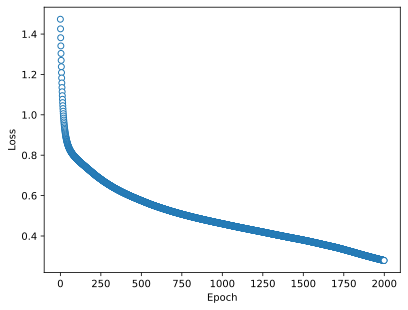

In [135]:
# show the losses
plt.plot(losses.detach(),'o',markerfacecolor='w',linewidth=.1)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [136]:
# computing the predictions

# manually computing losses and final forward pass
predictions = classifyANN(data)
predictionLabels = predictions>.5

# find errors
misclassified = np.where(predictionLabels != labels)[0]

# total accuracy
totalAcc = 100-100*len(misclassified)/(2*nPerClust)

print('Final accuracy: %g%%' %totalAcc)

Final accuracy: 93%


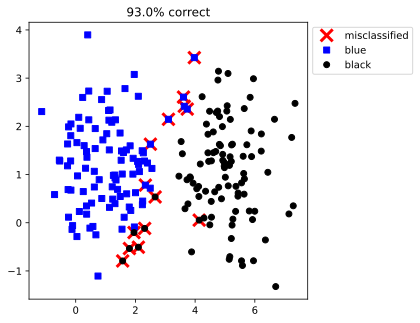

In [137]:
# plotting the labeled data 
fig = plt.figure(figsize=(5,5))
plt.plot(data[misclassified,0],data[misclassified,1],'rx',markersize=12,markeredgewidth=3)
plt.plot(data[np.where(~predictionLabels)[0],0],data[np.where(~predictionLabels)[0],1],'bs')
plt.plot(data[np.where(predictionLabels)[0],0],data[np.where(predictionLabels)[0],1],'ko')

plt.legend(['misclassified','blue','black'],bbox_to_anchor=(1,1))
plt.title(f'{totalAcc}% correct')
plt.show()